[View in Colaboratory](https://colab.research.google.com/github/mxchauhan/Thinkful-Bootcamp-Drills/blob/master/Unit_1_Municipal_Waste_&_GDP_Same_data_multiple_ways.ipynb)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Total Municipal Waste Collected.csv to Total Municipal Waste Collected.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
waste = pd.read_csv("Total Municipal Waste Collected.csv")

In [5]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 4.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import seaborn as sns

In [7]:
# Remove footnotes
waste = waste.iloc[:1587,:]
waste.columns = ["country", "year", "value", "valueFootnotes", "unit"]
waste.drop('valueFootnotes', axis=1, inplace=True)
waste["value"] = waste["value"].astype(float)
waste["year"] = waste["year"].astype(int)
waste.head(10)

,country,year,value,unit
0,Albania,2003,1057.000000,1000 tonnes
1,Algeria,2015,5182.157227,1000 tonnes
2,Algeria,2014,4816.811035,1000 tonnes
3,Andorra,2015,42.070114,1000 tonnes
4,Andorra,2014,41.141983,1000 tonnes
5,Andorra,2013,41.649109,1000 tonnes
6,Andorra,2012,43.139999,1000 tonnes
7,Andorra,2011,44.779999,1000 tonnes
8,Andorra,2010,51.970001,1000 tonnes
9,Andorra,2009,47.919998,1000 tonnes


In [0]:
usa = waste.loc[lambda waste: waste.country=="United States of America", :].reset_index()
china = waste.loc[lambda waste: waste.country=="China", :].reset_index()
both = pd.concat((usa, china)).reset_index()

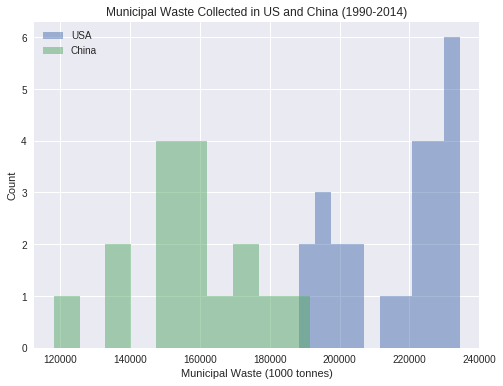

In [9]:
usaValue = usa.value
chinaValue = china.value

plt.figure(figsize=(8,6))
plt.hist(usaValue, alpha=.5, label='USA')
plt.hist(chinaValue, alpha=.5, label='China')
plt.xlabel("Municipal Waste (1000 tonnes)")
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.title("Municipal Waste Collected in US and China (1990-2014)")
plt.show()

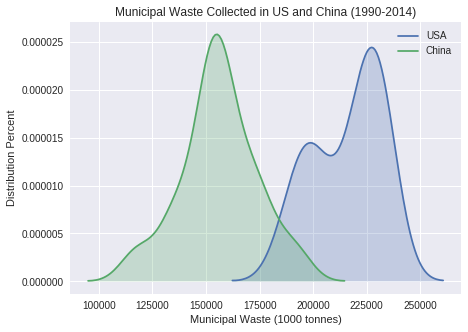

In [10]:
plt.figure(figsize=(7,5))
sns.kdeplot(usa.value, shade=True, label='USA')
sns.kdeplot(china.value, shade=True, label='China')
plt.xlabel("Municipal Waste (1000 tonnes)")
plt.ylabel("Distribution Percent")
plt.title("Municipal Waste Collected in US and China (1990-2014)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  linewidth = mpl.rcParams["lines.linewidth"]


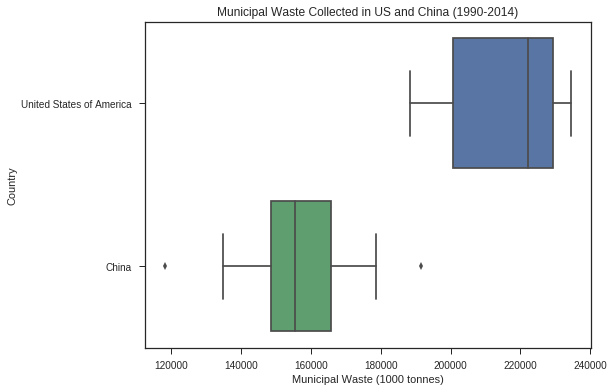

In [11]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.boxplot(y='country', x='value', data=both)
plt.xlabel("Municipal Waste (1000 tonnes)")
plt.ylabel('Country')
plt.title("Municipal Waste Collected in US and China (1990-2014)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


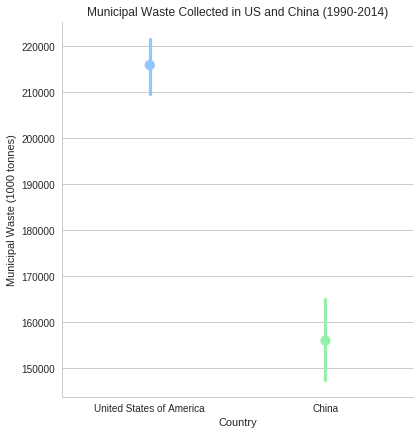

In [12]:
sns.set(style='whitegrid')
sns.factorplot(x='country', y='value', data=both, kind='point', palette='pastel', size=6, join=False)
plt.ylabel("Municipal Waste (1000 tonnes)")
plt.xlabel('Country')
plt.title("Municipal Waste Collected in US and China (1990-2014)")
plt.show()

In [0]:
usa = usa.sort_values('year')
## USA = USA.reset_index(drop=True)
usa = usa.set_index(usa.year)

In [14]:
usa.head(10)

,index,country,year,value,unit
year,,,,,
1990,1554,United States of America,1990,188939.0,1000 tonnes
1991,1553,United States of America,1991,188449.0,1000 tonnes
1992,1552,United States of America,1992,194990.0,1000 tonnes
1993,1551,United States of America,1993,197748.0,1000 tonnes
1994,1550,United States of America,1994,200742.0,1000 tonnes
1995,1549,United States of America,1995,197113.0,1000 tonnes
1996,1548,United States of America,1996,195943.0,1000 tonnes
1997,1547,United States of America,1997,202393.0,1000 tonnes
1998,1546,United States of America,1998,206040.0,1000 tonnes


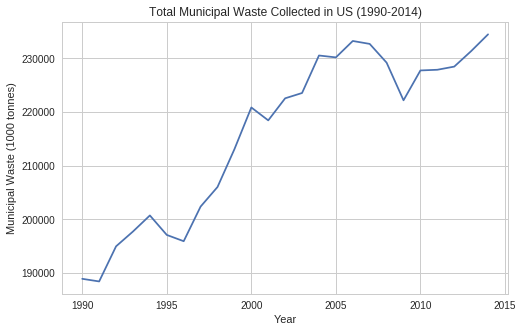

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(usa.value)
plt.ylabel("Municipal Waste (1000 tonnes)")
plt.xlabel("Year")
plt.title("Total Municipal Waste Collected in US (1990-2014)")
plt.xticks(rotation = 0)
plt.locator_params(axis = 'x', nbins=6)
plt.show()

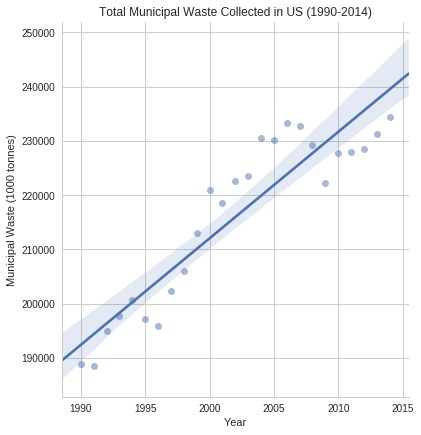

In [16]:
sns.lmplot(y='value', x='year', fit_reg=True, scatter_kws={'alpha':0.5}, size=6, data=usa)
plt.ylabel('Municipal Waste (1000 tonnes)')
plt.xlabel("Year")
plt.title("Total Municipal Waste Collected in US (1990-2014)")
plt.show()

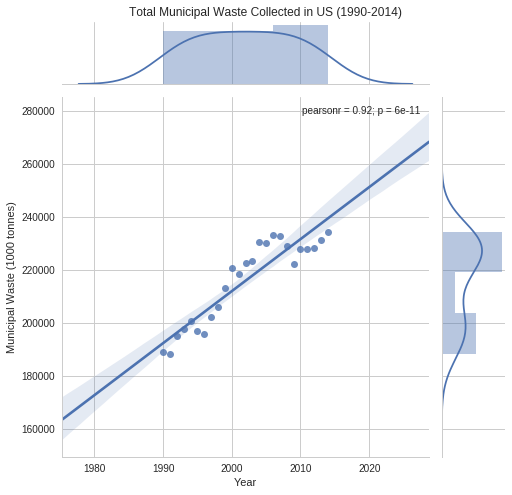

In [17]:
plt.figure(figsize=(8, 8))
sns.jointplot("year", "value", data=usa, kind='reg', size=7)
plt.ylabel('Municipal Waste (1000 tonnes)')
plt.xlabel("Year")
plt.suptitle('Total Municipal Waste Collected in US (1990-2014)', fontsize=12)
plt.subplots_adjust(top=0.95)
plt.show()

In [18]:
wasteCountry = waste.groupby(['country']).mean().sort_values('value', ascending=False)
wasteCountry.drop('year', axis=1, inplace=True)
other = wasteCountry[16:].mean()
wasteCountry = wasteCountry[:16]
wasteCountry.loc[16] = other
wasteCountry.rename(index = {16:'Other'}, inplace=True)
wasteCountry.head(10)

,value
country,
United States of America,215951.680000
China,156019.812500
Botswana,108472.472656
Japan,50695.418594
Germany,50427.818182
Egypt,47254.524902
Mexico,32877.248047
United Kingdom of Great Britain and Northern Ireland,32806.904762
France,32730.136364


In [54]:
wasteCountry.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK', "United States of America": "USA"}, inplace=True)
wasteCountry.head(10)

,value
country,
USA,215951.680000
China,156019.812500
Botswana,108472.472656
Japan,50695.418594
Germany,50427.818182
Egypt,47254.524902
Mexico,32877.248047
UK,32806.904762
France,32730.136364


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


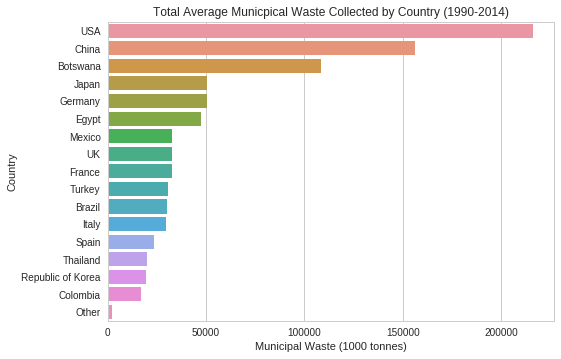

In [20]:
sns.barplot(y=wasteCountry.index, x=wasteCountry.value)
plt.title('Total Average Municpical Waste Collected by Country (1990-2014)')
plt.ylabel('Country')
plt.xlabel('Municipal Waste (1000 tonnes)')
plt.show()

In [98]:
countryCompare = waste.loc[waste.country.isin(['United States of America',
                                               'China',
                                               'Japan',
                                               'Brazil',
                                               'Germany',
                                               'Iceland',
                                               'United Kingdom of Great Britain and Northern Ireland',
                                               'Australia',
                                               'Egypt'
                                              ])]
countryCompare = countryCompare.sort_values('value', ascending=False)
countryCompare = countryCompare.set_index(countryCompare.country)
countryCompare.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK', "United States of America": "USA"}, inplace=True)
countryCompare.head(10)

,country,year,value,unit
country,,,,
USA,United States of America,2014,234471.0,1000 tonnes
USA,United States of America,2006,233237.0,1000 tonnes
USA,United States of America,2007,232693.0,1000 tonnes
USA,United States of America,2013,231350.0,1000 tonnes
USA,United States of America,2004,230534.0,1000 tonnes
USA,United States of America,2005,230180.0,1000 tonnes
USA,United States of America,2008,229200.0,1000 tonnes
USA,United States of America,2012,228465.0,1000 tonnes
USA,United States of America,2011,227876.0,1000 tonnes


In [102]:
sns.catplot(x=countryCompare.index, y="value", kind="swarm", data=countryCompare, height=8)
plt.ylabel("Average Municipal Waste (1000 tonnes)")
plt.xlabel('Country')
plt.title("Total Municipal Waste Collected in Various Developed/ing Countries (1990-2014)")
plt.show()

AttributeError: ignored

In [0]:
china = china.sort_values('year').set_index(china.year)

japan = waste.loc[lambda waste: waste.country=="Japan", :].reset_index()
japan = japan.sort_values('year').set_index(japan.year)

brazil = waste.loc[lambda waste: waste.country=="Brazil", :].reset_index()
brazil = brazil.sort_values('year').set_index(brazil.year)

germany = waste.loc[lambda waste: waste.country=="Germany", :].reset_index()
germany = germany.sort_values('year').set_index(germany.year)

uk = waste.loc[lambda waste: waste.country=="United Kingdom of Great Britain and Northern Ireland", :].reset_index()
uk = uk.sort_values('year').set_index(uk.year)

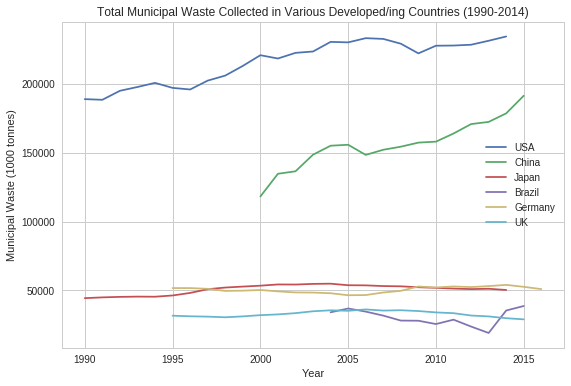

In [53]:
plt.figure(figsize=(9, 6))
plt.plot(usa.value, label='USA')
plt.plot(china.value, label='China')
plt.plot(japan.value, label='Japan')
plt.plot(brazil.value, label='Brazil')
plt.plot(germany.value, label='Germany')
plt.plot(uk.value, label='UK')
plt.ylabel("Municipal Waste (1000 tonnes)")
plt.xlabel("Year")
plt.title("Total Municipal Waste Collected in Various Developed/ing Countries (1990-2014)")
plt.legend()
plt.locator_params(axis = 'x', nbins=6)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  linewidth = mpl.rcParams["lines.linewidth"]


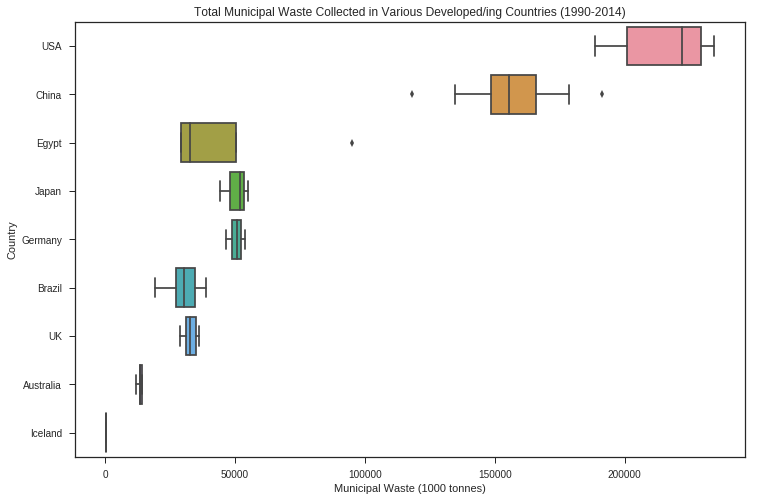

In [101]:
sns.set(style="ticks")
plt.figure(figsize=(12, 8))
sns.boxplot(y=countryCompare.index, x='value', data=countryCompare)
plt.xlabel("Municipal Waste (1000 tonnes)")
plt.ylabel('Country')
plt.title("Total Municipal Waste Collected in Various Developed/ing Countries (1990-2014)")
plt.show()

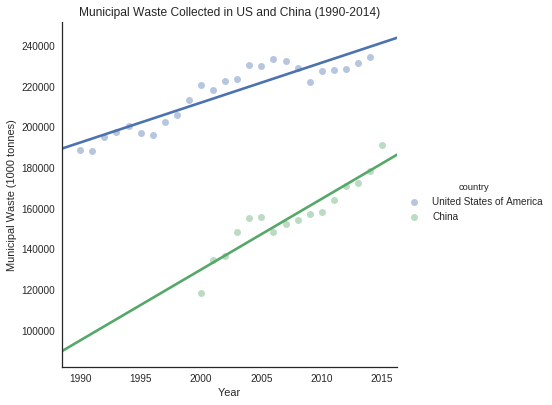

In [69]:
sns.set(style="white")

sns.lmplot(y='value', 
           x='year',
           hue='country',
           data=both,
           fit_reg=True,
           ci=False,
           scatter_kws={'alpha':0.4},
           size=6)
plt.xlabel("Year")
plt.ylabel("Municipal Waste (1000 tonnes)")
plt.title("Municipal Waste Collected in US and China (1990-2014)")
plt.subplots_adjust(top=0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


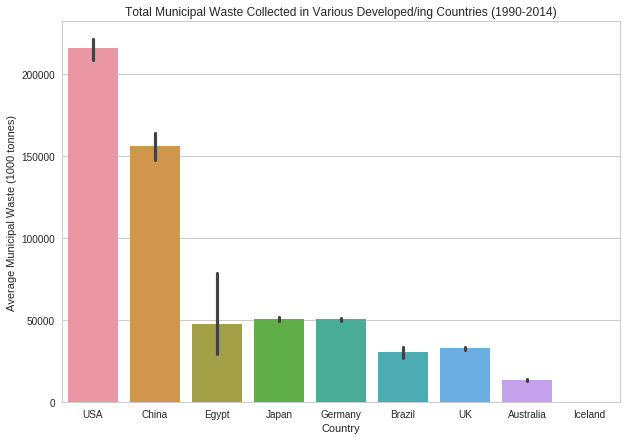

In [99]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
sns.barplot(x=countryCompare.index, y='value', data=countryCompare)
plt.ylabel("Average Municipal Waste (1000 tonnes)")
plt.xlabel('Country')
plt.title("Total Municipal Waste Collected in Various Developed/ing Countries (1990-2014)")
plt.show()